This code uses python and jupyter notebooks to analyze data provided through PCW's linode.
This code will look for locally downloaded .json files and add all entries into a data frame.
Thank you chatgpt for making it really easy to refresh my knowledge.

In [153]:
#import necessary libraries

import pandas as pd        
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [97]:
#ensure that all json files are put into appropriate folder.
#loop through all files and append them to a main data frame.

folder_path = 'data/PCW'   #path name to general info
dfs = []                   #list of all data frames/data

for filename in os.listdir(folder_path):                    #for each file in data/PCW
    if filename.endswith('.json'):                          #if file is a .json
        filepath = os.path.join(folder_path, filename)      #create new file path. concatenate original filepath + target file    
        df = pd.read_json(filepath)                         #create a data frame using new file path
        dfs.append(df)                                      #append mini data frame to main data frame

df = pd.concat(dfs, ignore_index=True)                      #concatenate all dfs into one df


In [99]:
#lets take a look, check to make sure 
print(df)

#each file had ~500 entries, looks good

                            _id                mac                   site_id  \
0      61a92e43f7f8e45208fd7a9c  7e:52:8d:17:13:68  602ec7eef7f8e434c242d403   
1      6223be0df7f8e41f40ffea85  d8:c4:6a:bd:98:33  602ec7eef7f8e434c242d403   
2      63c7537cf7f8e4020886d14f  1c:d6:be:bd:6c:7e  602ec7eef7f8e434c242d403   
3      63c759cff7f8e4020886d475  42:4f:c4:62:45:e4  602ec7eef7f8e434c242d403   
4      63c75eedf7f8e4020886d64c  56:af:da:0f:23:ba  602ec7eef7f8e434c242d403   
...                         ...                ...                       ...   
17746  64162bdff7f8e40202b431b5  1a:1f:36:4c:1d:1d  602ec7eef7f8e434c242d403   
17747  64163025f7f8e40202b43477  a4:4b:15:cc:2b:3d  602ec7eef7f8e434c242d403   
17748  64164856f7f8e40202b44458  f0:35:75:10:ad:02  602ec7eef7f8e434c242d403   
17749  6416492ff7f8e40202b4446b  c2:cd:05:84:3d:fd  602ec7eef7f8e434c242d403   
17750  64164990f7f8e40202b44513  88:c2:55:8c:e2:7c  602ec7eef7f8e434c242d403   

                                       

In [101]:
#create a heatmap to visualize NaN values
#double check for invalid values and remove any if necessary.

plt.figure(figsize=(100, 100))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Null/Invalid Values in the DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

#most non valid col's are hostname, name, noted. this is expected.
#some invalid entries in disconnect time stamp.
#decision: use disconnect time stamp

In [102]:
#time stamps are in unix time
#add new col called first_seen_date_time
df['first_seen_datetime'] = pd.to_datetime(df['first_seen'], unit='s')
df['last_seen_datetime'] = pd.to_datetime(df['last_seen'], unit='s')

In [103]:
df.head()

,_id,mac,site_id,oui,is_guest,first_seen,last_seen,is_wired,usergroup_id,hostname,disconnect_timestamp,name,noted,wlanconf_id,first_seen_datetime,last_seen_datetime
0,61a92e43f7f8e45208fd7a9c,7e:52:8d:17:13:68,602ec7eef7f8e434c242d403,,True,1638477379,1661382448,False,,Pixel-4a,1.661382e+09,Alex,1.0,602ed913f7f8e4408d8559fe,2021-12-02 20:36:19,2022-08-24 23:07:28
1,6223be0df7f8e41f40ffea85,d8:c4:6a:bd:98:33,602ec7eef7f8e434c242d403,"Murata Manufacturing Co., Ltd.",True,1646509581,1646526661,False,,Galaxy-S7-edge,1.646527e+09,Allan,1.0,NaN,2022-03-05 19:46:21,2022-03-06 00:31:01
2,63c7537cf7f8e4020886d14f,1c:d6:be:bd:6c:7e,602ec7eef7f8e434c242d403,Wistron Neweb Corporation,True,1674007420,1679546981,False,,NaN,1.679547e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:03:40,2023-03-23 04:49:41
3,63c759cff7f8e4020886d475,42:4f:c4:62:45:e4,602ec7eef7f8e434c242d403,,True,1674009039,1680045413,False,,NaN,1.680045e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:30:39,2023-03-28 23:16:53
4,63c75eedf7f8e4020886d64c,56:af:da:0f:23:ba,602ec7eef7f8e434c242d403,,True,1674010349,1679969915,False,,NaN,1.679970e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:52:29,2023-03-28 02:18:35


In [107]:
#extract date part (yyyy/mm/dd), add new col
df['first_seen_date'] = df['first_seen_datetime'].dt.strftime('%Y/%m/%d')
df['last_seen_date'] = df['last_seen_datetime'].dt.strftime('%Y/%m/%d')

In [109]:
df.head()

,_id,mac,site_id,oui,is_guest,first_seen,last_seen,is_wired,usergroup_id,hostname,disconnect_timestamp,name,noted,wlanconf_id,first_seen_datetime,last_seen_datetime,first_seen_date,last_seen_date
0,61a92e43f7f8e45208fd7a9c,7e:52:8d:17:13:68,602ec7eef7f8e434c242d403,,True,1638477379,1661382448,False,,Pixel-4a,1.661382e+09,Alex,1.0,602ed913f7f8e4408d8559fe,2021-12-02 20:36:19,2022-08-24 23:07:28,2021/12/02,2022/08/24
1,6223be0df7f8e41f40ffea85,d8:c4:6a:bd:98:33,602ec7eef7f8e434c242d403,"Murata Manufacturing Co., Ltd.",True,1646509581,1646526661,False,,Galaxy-S7-edge,1.646527e+09,Allan,1.0,NaN,2022-03-05 19:46:21,2022-03-06 00:31:01,2022/03/05,2022/03/06
2,63c7537cf7f8e4020886d14f,1c:d6:be:bd:6c:7e,602ec7eef7f8e434c242d403,Wistron Neweb Corporation,True,1674007420,1679546981,False,,NaN,1.679547e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:03:40,2023-03-23 04:49:41,2023/01/18,2023/03/23
3,63c759cff7f8e4020886d475,42:4f:c4:62:45:e4,602ec7eef7f8e434c242d403,,True,1674009039,1680045413,False,,NaN,1.680045e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:30:39,2023-03-28 23:16:53,2023/01/18,2023/03/28
4,63c75eedf7f8e4020886d64c,56:af:da:0f:23:ba,602ec7eef7f8e434c242d403,,True,1674010349,1679969915,False,,NaN,1.679970e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:52:29,2023-03-28 02:18:35,2023/01/18,2023/03/28


In [111]:
#okay so cant use first seen and last seen. just realized it isnt first seen for the day, but first seen ever
#instead we will use disconnect time_stamp
df['disconnect_timestamp_datetime'] = pd.to_datetime(df['disconnect_timestamp'], unit='s')

In [113]:
df.head()

,_id,mac,site_id,oui,is_guest,first_seen,last_seen,is_wired,usergroup_id,hostname,disconnect_timestamp,name,noted,wlanconf_id,first_seen_datetime,last_seen_datetime,first_seen_date,last_seen_date,disconnect_timestamp_datetime
0,61a92e43f7f8e45208fd7a9c,7e:52:8d:17:13:68,602ec7eef7f8e434c242d403,,True,1638477379,1661382448,False,,Pixel-4a,1.661382e+09,Alex,1.0,602ed913f7f8e4408d8559fe,2021-12-02 20:36:19,2022-08-24 23:07:28,2021/12/02,2022/08/24,2022-08-24 23:07:49
1,6223be0df7f8e41f40ffea85,d8:c4:6a:bd:98:33,602ec7eef7f8e434c242d403,"Murata Manufacturing Co., Ltd.",True,1646509581,1646526661,False,,Galaxy-S7-edge,1.646527e+09,Allan,1.0,NaN,2022-03-05 19:46:21,2022-03-06 00:31:01,2022/03/05,2022/03/06,2022-03-06 00:32:00
2,63c7537cf7f8e4020886d14f,1c:d6:be:bd:6c:7e,602ec7eef7f8e434c242d403,Wistron Neweb Corporation,True,1674007420,1679546981,False,,NaN,1.679547e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:03:40,2023-03-23 04:49:41,2023/01/18,2023/03/23,2023-03-23 04:50:25
3,63c759cff7f8e4020886d475,42:4f:c4:62:45:e4,602ec7eef7f8e434c242d403,,True,1674009039,1680045413,False,,NaN,1.680045e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:30:39,2023-03-28 23:16:53,2023/01/18,2023/03/28,2023-03-28 23:17:04
4,63c75eedf7f8e4020886d64c,56:af:da:0f:23:ba,602ec7eef7f8e434c242d403,,True,1674010349,1679969915,False,,NaN,1.679970e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:52:29,2023-03-28 02:18:35,2023/01/18,2023/03/28,2023-03-28 02:18:36


In [115]:
#extract date part (yyyy/mm/dd), add new col
df['disconnect_timestamp_date'] = df['disconnect_timestamp_datetime'].dt.strftime('%Y/%m/%d')
df.head()

,_id,mac,site_id,oui,is_guest,first_seen,last_seen,is_wired,usergroup_id,hostname,disconnect_timestamp,name,noted,wlanconf_id,first_seen_datetime,last_seen_datetime,first_seen_date,last_seen_date,disconnect_timestamp_datetime,disconnect_timestamp_date
0,61a92e43f7f8e45208fd7a9c,7e:52:8d:17:13:68,602ec7eef7f8e434c242d403,,True,1638477379,1661382448,False,,Pixel-4a,1.661382e+09,Alex,1.0,602ed913f7f8e4408d8559fe,2021-12-02 20:36:19,2022-08-24 23:07:28,2021/12/02,2022/08/24,2022-08-24 23:07:49,2022/08/24
1,6223be0df7f8e41f40ffea85,d8:c4:6a:bd:98:33,602ec7eef7f8e434c242d403,"Murata Manufacturing Co., Ltd.",True,1646509581,1646526661,False,,Galaxy-S7-edge,1.646527e+09,Allan,1.0,NaN,2022-03-05 19:46:21,2022-03-06 00:31:01,2022/03/05,2022/03/06,2022-03-06 00:32:00,2022/03/06
2,63c7537cf7f8e4020886d14f,1c:d6:be:bd:6c:7e,602ec7eef7f8e434c242d403,Wistron Neweb Corporation,True,1674007420,1679546981,False,,NaN,1.679547e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:03:40,2023-03-23 04:49:41,2023/01/18,2023/03/23,2023-03-23 04:50:25,2023/03/23
3,63c759cff7f8e4020886d475,42:4f:c4:62:45:e4,602ec7eef7f8e434c242d403,,True,1674009039,1680045413,False,,NaN,1.680045e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:30:39,2023-03-28 23:16:53,2023/01/18,2023/03/28,2023-03-28 23:17:04,2023/03/28
4,63c75eedf7f8e4020886d64c,56:af:da:0f:23:ba,602ec7eef7f8e434c242d403,,True,1674010349,1679969915,False,,NaN,1.679970e+09,NaN,NaN,602ed913f7f8e4408d8559fe,2023-01-18 02:52:29,2023-03-28 02:18:35,2023/01/18,2023/03/28,2023-03-28 02:18:36,2023/03/28


In [117]:
#for some reason, the dates are widely ranging even though the data originally downloaded should have been 2023 March 1 - 3.
#try this

#group by the date and count unique users
daily_unique_users = df.groupby('disconnect_timestamp_date')['mac'].nunique().reset_index()

# Rename columns for clarity
daily_unique_users.columns = ['Date', 'Unique MAC IDs']

print(daily_unique_users)


          Date  Unique MAC IDs
0   2022/03/06               1
1   2022/08/24               1
2   2023/02/22              18
3   2023/02/23              49
4   2023/02/24              49
5   2023/02/25              38
6   2023/02/26              42
7   2023/02/27              75
8   2023/02/28             110
9   2023/03/01             190
10  2023/03/02             168
11  2023/03/03             173
12  2023/03/04             154
13  2023/03/05             144
14  2023/03/06             193
15  2023/03/07             187
16  2023/03/08             203
17  2023/03/09             114
18  2023/03/10             192
19  2023/03/11             145
20  2023/03/12             146
21  2023/03/13              98
22  2023/03/14             193
23  2023/03/15             204
24  2023/03/16             198
25  2023/03/17             197
26  2023/03/18             188
27  2023/03/19              84
28  2023/03/20             200
29  2023/03/21             199
30  2023/03/22             221
31  2023

In [119]:
#currently 'date' is a string.
#turn it into a datetime object for easier sorting.
daily_unique_users['Date'] = pd.to_datetime(daily_unique_users['Date'])
print(daily_unique_users)

         Date  Unique MAC IDs
0  2022-03-06               1
1  2022-08-24               1
2  2023-02-22              18
3  2023-02-23              49
4  2023-02-24              49
5  2023-02-25              38
6  2023-02-26              42
7  2023-02-27              75
8  2023-02-28             110
9  2023-03-01             190
10 2023-03-02             168
11 2023-03-03             173
12 2023-03-04             154
13 2023-03-05             144
14 2023-03-06             193
15 2023-03-07             187
16 2023-03-08             203
17 2023-03-09             114
18 2023-03-10             192
19 2023-03-11             145
20 2023-03-12             146
21 2023-03-13              98
22 2023-03-14             193
23 2023-03-15             204
24 2023-03-16             198
25 2023-03-17             197
26 2023-03-18             188
27 2023-03-19              84
28 2023-03-20             200
29 2023-03-21             199
30 2023-03-22             221
31 2023-03-23             207
32 2023-03

In [121]:
#scrub data. eliminate dates which we are not interested in.
#in this example we work with March 1-3.

#date range yyyy-mm-dd
start_date = '2023-03-01'
end_date = '2023-03-31'

#filter
filtered_df = daily_unique_users[(daily_unique_users['Date'] >= start_date) & (daily_unique_users['Date'] <= end_date)]

#display
print(filtered_df)

         Date  Unique MAC IDs
9  2023-03-01             190
10 2023-03-02             168
11 2023-03-03             173
12 2023-03-04             154
13 2023-03-05             144
14 2023-03-06             193
15 2023-03-07             187
16 2023-03-08             203
17 2023-03-09             114
18 2023-03-10             192
19 2023-03-11             145
20 2023-03-12             146
21 2023-03-13              98
22 2023-03-14             193
23 2023-03-15             204
24 2023-03-16             198
25 2023-03-17             197
26 2023-03-18             188
27 2023-03-19              84
28 2023-03-20             200
29 2023-03-21             199
30 2023-03-22             221
31 2023-03-23             207
32 2023-03-24             198
33 2023-03-25             170
34 2023-03-26             167
35 2023-03-27             218
36 2023-03-28             233
37 2023-03-29             197
38 2023-03-30             222
39 2023-03-31             244


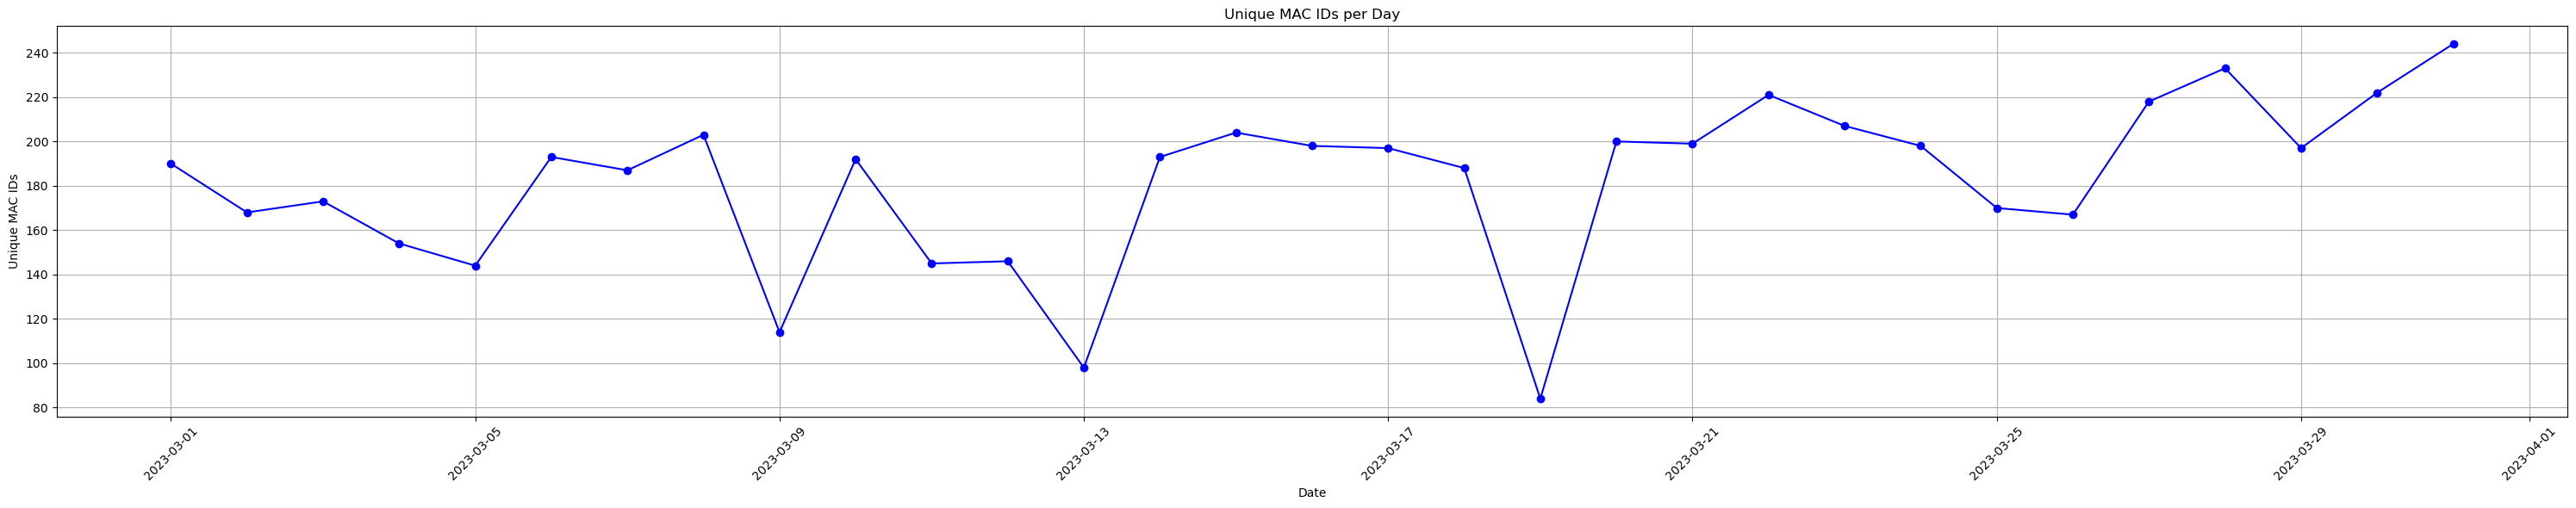

In [123]:
plt.figure(figsize=(30, 6))
plt.plot(filtered_df['Date'], filtered_df['Unique MAC IDs'], marker='o', linestyle='-', color='b')
plt.title('Unique MAC IDs per Day')
plt.xlabel('Date')
plt.ylabel('Unique MAC IDs')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [139]:
# Convert dates to days since the first date
df1 = filtered_df
print(df1)

         Date  Unique MAC IDs  Days
9  2023-03-01             190     0
10 2023-03-02             168     1
11 2023-03-03             173     2
12 2023-03-04             154     3
13 2023-03-05             144     4
14 2023-03-06             193     5
15 2023-03-07             187     6
16 2023-03-08             203     7
17 2023-03-09             114     8
18 2023-03-10             192     9
19 2023-03-11             145    10
20 2023-03-12             146    11
21 2023-03-13              98    12
22 2023-03-14             193    13
23 2023-03-15             204    14
24 2023-03-16             198    15
25 2023-03-17             197    16
26 2023-03-18             188    17
27 2023-03-19              84    18
28 2023-03-20             200    19
29 2023-03-21             199    20
30 2023-03-22             221    21
31 2023-03-23             207    22
32 2023-03-24             198    23
33 2023-03-25             170    24
34 2023-03-26             167    25
35 2023-03-27             21

In [145]:
# Step 1: Convert dates to days since the first date
df1.loc[:, 'Days'] = (df1['Date'] - df1['Date'].min()).dt.days
print(df1)

         Date  Unique MAC IDs  Days
9  2023-03-01             190     0
10 2023-03-02             168     1
11 2023-03-03             173     2
12 2023-03-04             154     3
13 2023-03-05             144     4
14 2023-03-06             193     5
15 2023-03-07             187     6
16 2023-03-08             203     7
17 2023-03-09             114     8
18 2023-03-10             192     9
19 2023-03-11             145    10
20 2023-03-12             146    11
21 2023-03-13              98    12
22 2023-03-14             193    13
23 2023-03-15             204    14
24 2023-03-16             198    15
25 2023-03-17             197    16
26 2023-03-18             188    17
27 2023-03-19              84    18
28 2023-03-20             200    19
29 2023-03-21             199    20
30 2023-03-22             221    21
31 2023-03-23             207    22
32 2023-03-24             198    23
33 2023-03-25             170    24
34 2023-03-26             167    25
35 2023-03-27             21

In [154]:
# Step 2: Fit the Linear Regression Model
X = df1[['Days']]
y = df1['Unique MAC IDs']

In [157]:
#create the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [163]:
# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_
print(slope)
print(intercept)

1.7899193548387091
155.3125


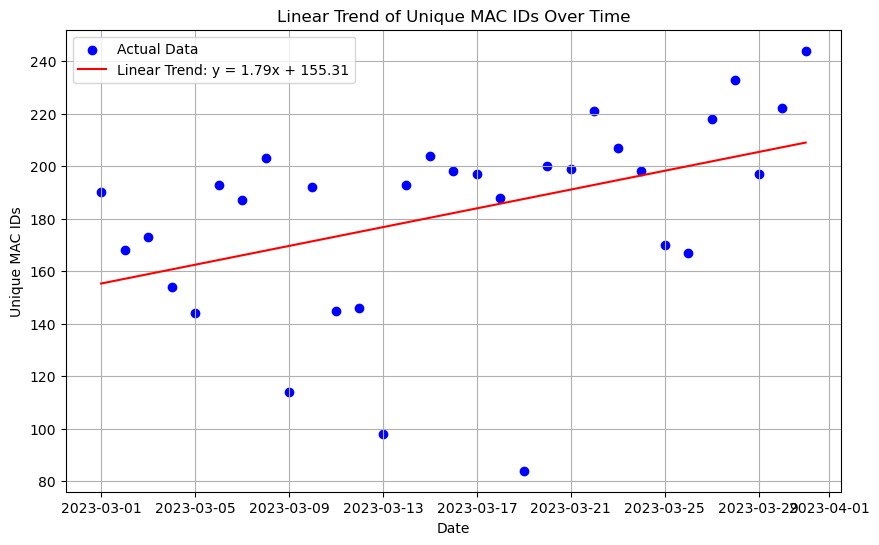

In [167]:
# Step 3: Visualize the trend
plt.figure(figsize=(10, 6))
plt.scatter(df1['Date'], df1['Unique MAC IDs'], color='blue', label='Actual Data')
plt.plot(df1['Date'], model.predict(X), color='red', label=f'Linear Trend: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Date')
plt.ylabel('Unique MAC IDs')
plt.title('Linear Trend of Unique MAC IDs Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#slope here can be interpreted as ~2 new people every day are using the network.
#maybe if we want to see an increase in numbers we can target some places around temple area.
#somewhere where students are living off campus and need to save money.